# <font color='blue'><font size ='9'>  instance segmentation/classification

This module will learn the basic concepts of machine learning classification, and the realted two applications in plant pathology.

# <font color='blue'> <font size ='6'> 1. Evaluation Metrics for Classification

# Section 1 objective:
* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1 score
* Precision-Recall Curve
* PR AUC score | Average precision
* mean Average Precision

https://neptune.ai/blog/evaluation-metrics-binary-classification

# 1.1 Confusion Matrix

It is a common way of presenting true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions.
Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.
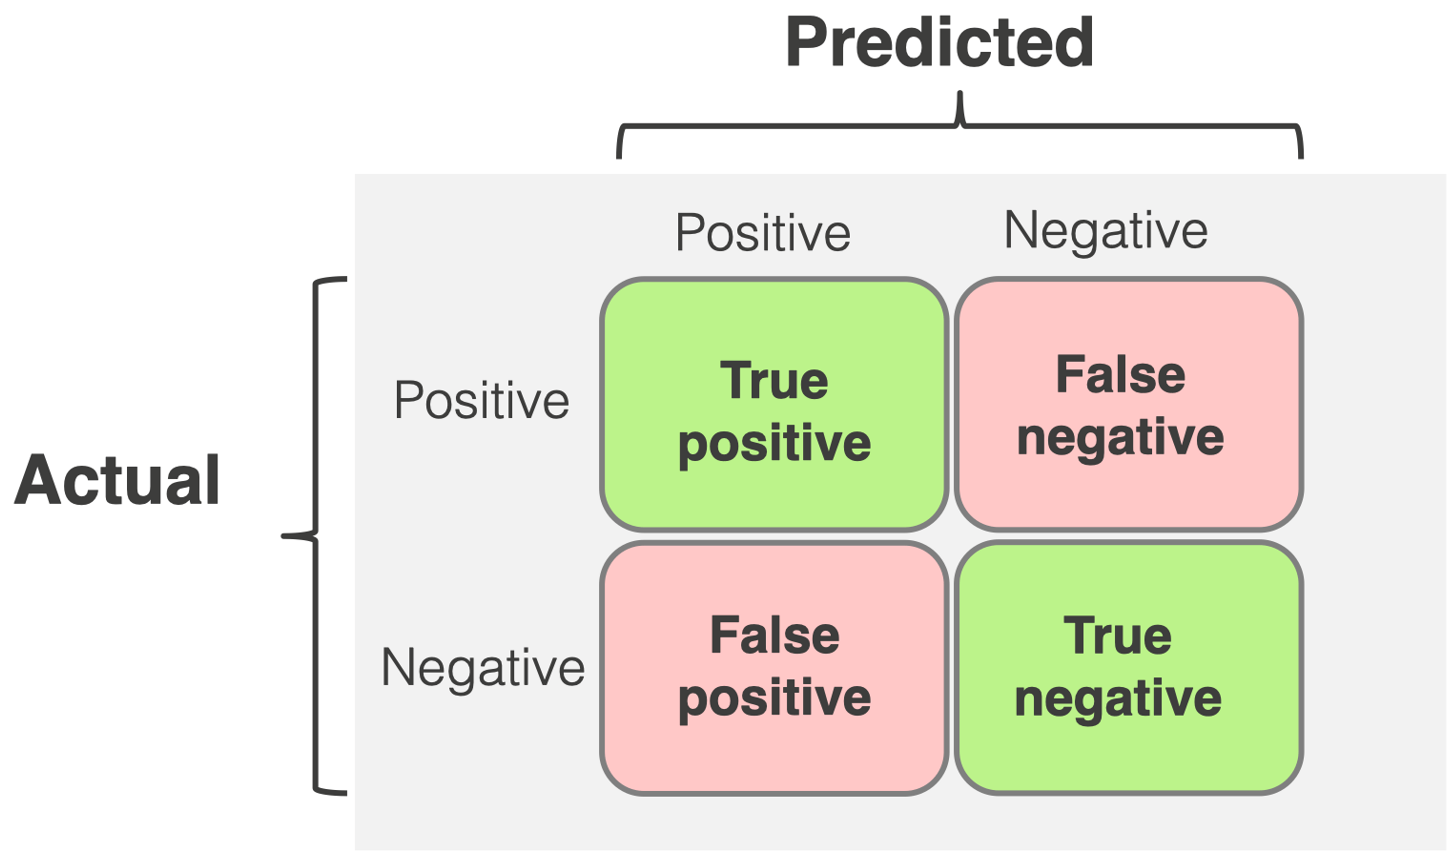

# 1.2 Accuracy

It measures how many observations, both positive and negative, were correctly classified.
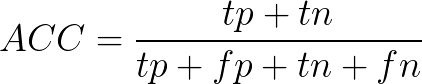

You shouldn’t use accuracy on **imbalanced** problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the **majority** class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.

# 1.3 Precision | Positive Predictive Value

It measures how many observations predicted as positive are in fact positive.

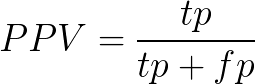

When you are optimizing precision you want to make sure that **the tylose you predicted are true tylose.**

# 1.4 Recall | True Positive Rate | Sensitivity

It measures how many observations out of all positive observations have we classified as positive. It tells us how many tyloses we recalled from all tyloses.

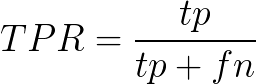

When you are optimizing recall you want to **put all guilty in prison**.

# 1.5 F1 score

F1 score is the harmonic mean between precision and recall, a special case of F beta score (**beta = 1**).

The F beta score combines precision and recall into one metric. The higher the score the better our model is. It can be calculated in the following way:

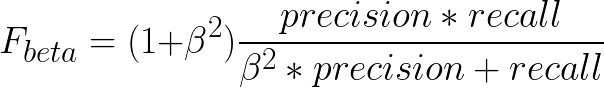

When choosing beta in the F-beta score, the **higher beta** means the **more you care about recall** over precision. For example, with F1 score we care equally about recall and precision; with F2 score, recall is twice as important to us.

# 1.6 Precision-Recall Curve

It is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. The higher on y-axis your curve is the better your model performance.

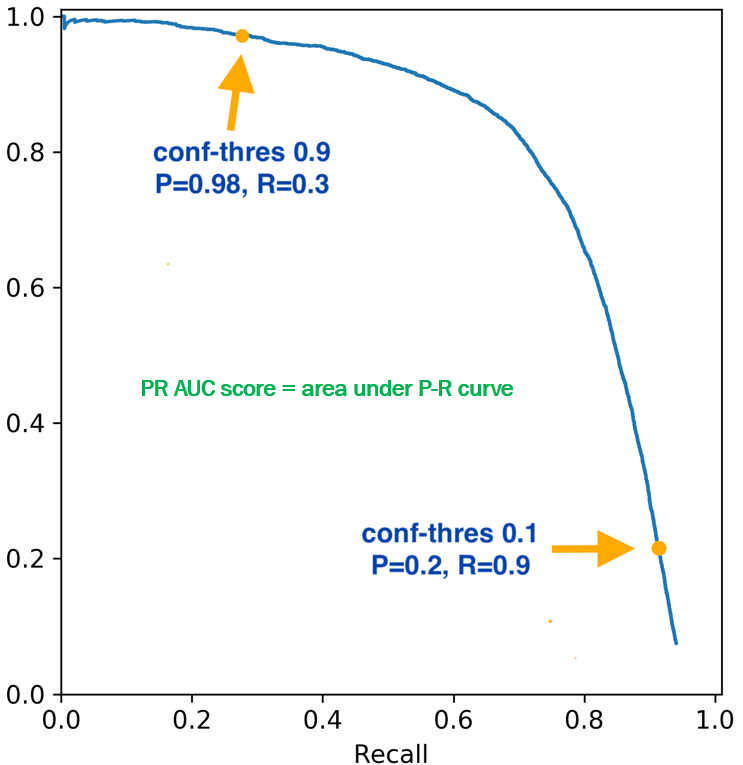


You can use this plot to make an educated decision when it comes to the classic precision/recall dilemma. Obviously, the higher the recall the lower the precision. Knowing **at which recall your precision starts to fall fast** can help you choose the threshold and deliver a better model.

# 1.7 PR AUC score | Average precision
 In order to get one number that tells us how good our curve is, we can calculate the Area Under the PR Curve, or PR AUC score. The more top-right your curve is the higher the area and hence higher PR AUC score.

You can also think about PR AUC as the average of precision scores calculated for each recall threshold [0, 1]. You can also adjust this definition to suit your project needs by choosing/clipping recall thresholds if needed.


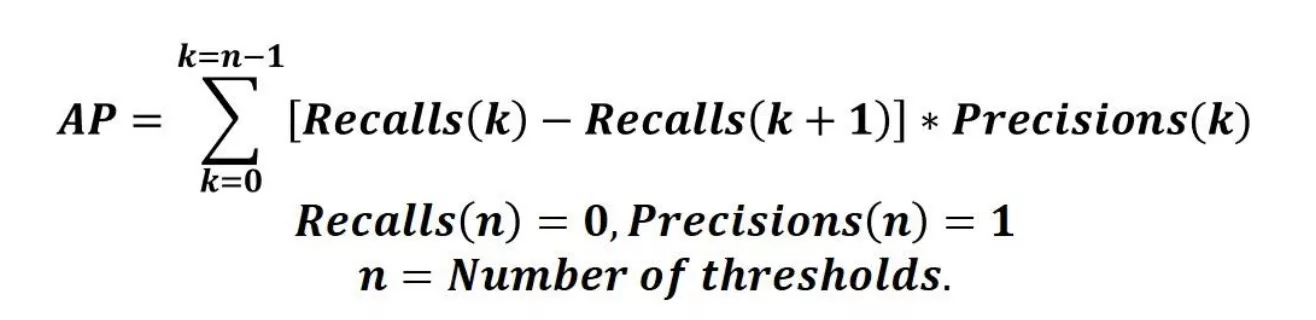

# 1.8 mean Average precision (mAP)

The mAP is calculated by finding Average Precision(AP) for each class and then average over a number of classes.

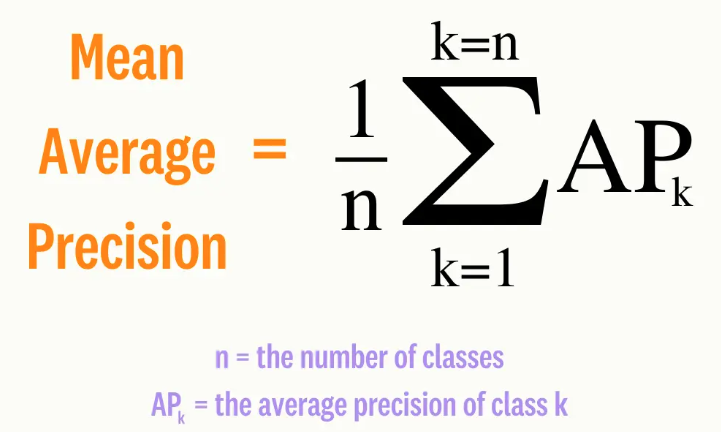

# <font color='blue'><font size ='6'> 2. vessel/tylose classification


## The probelm: Difficult to count vessel/tylose
It is tedious to count the number of vessels and tyloses on the micrope images, and possibly count incorrectly.

## The solution: instance segmentation
Select a pre-trained image-segmentation model to train on custom images. The target variables will be treated as two classes during the instance segmentation.

## Section 2 objective:
* Train a custom YOLO v8 model using your own data

## 2.1 Data preparation

The data used in this notebook is the **courtesy of**: **Joshua Konkol, Jeffrey Rollins**

If you already have annotations in COCO format JSON file, for example by annotating using makesense (https://www.makesense.ai/) then the annotations can be imported to Roboflow for conversion to YOLO format.

Otherwise, if you are starting from scratch, just annotate datasets on Roboflow. (https://roboflow.com/). You just need to upload your images along with the JSON file and Roboflow will convert them to any other format, in our case YOLO v8.

For information about YOLO models:

https://docs.ultralytics.com/models/yolov8/#key-features

## 2.2 Platform preparation

### 2.2.1 Change to GPU/TPU

Runtime --> Change runtime type --> ...

### 2.2.2 Mount to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.3 Install the required libraries

In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 10.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

## 2.4 Import a model and populate it with pre-trained weights.

Here, we are importing an instance segmentation model with weights.
For a list of pre-trained models, checkout: https://docs.ultralytics.com/models/yolov8/#key-features

In [ ]:
#Instance
model = YOLO('yolov8x-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8x-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

# resume the previous model training
# model = YOLO("2-3images_640x640.v1i.yolov8/results_v8x/200_epochs-/weights/last.pt")

100%|██████████| 137M/137M [00:00<00:00, 223MB/s]


In [ ]:
%pwd

'/content'

**Replace ".."** in the data.yaml with "/content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8".
So that the data.yaml looks like:

train: /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/train/images

val: /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/valid/images

## 2.5 Train the model

In [ ]:
#Define a project --> Destination directory for all results
project = "drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x"

#Define subdirectory for this specific training
name = "10_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

# Train the model
results = model.train(data='drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/data.yaml',
                      project=project,
                      name=name,
                      epochs=10,
                      agnostic_nms=True,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=8,
                      imgsz=640)


Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/data.yaml, epochs=10, time=None, patience=0, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x, name=10_epochs-5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=True, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/train/labels.cache... 1446 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1446/1446 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/valid/labels.cache... 362 images, 0 backgrounds, 0 corrupt: 100%|██████████| 362/362 [00:00<?, ?it/s]


Plotting labels to drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.67G     0.9333      1.726     0.9151      1.191         39        640: 100%|██████████| 181/181 [02:35<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:46<00:00,  2.03s/it]


                   all        362       2175     0.0118      0.287    0.00848    0.00541    0.00744      0.156    0.00535    0.00186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.97G       0.97      1.647     0.8706       1.21         29        640: 100%|██████████| 181/181 [02:33<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:16<00:00,  1.41it/s]

                   all        362       2175      0.931      0.416      0.461      0.353      0.929      0.407      0.451      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.93G     0.9436      1.583     0.8256      1.197         33        640: 100%|██████████| 181/181 [02:32<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:15<00:00,  1.47it/s]

                   all        362       2175      0.942      0.433       0.48      0.372      0.936      0.428      0.469       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.95G     0.8973      1.506     0.7482      1.162         30        640: 100%|██████████| 181/181 [02:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.55it/s]

                   all        362       2175      0.938      0.434      0.475      0.373      0.937      0.424      0.465      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.98G     0.8938      1.474      0.713      1.152         51        640: 100%|██████████| 181/181 [02:30<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.54it/s]

                   all        362       2175       0.94      0.437      0.484      0.387       0.94      0.431      0.475      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10       9.9G     0.8816      1.368     0.6868      1.152         24        640: 100%|██████████| 181/181 [02:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.54it/s]

                   all        362       2175      0.939      0.444      0.504      0.399      0.933      0.437       0.49      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.89G     0.8367      1.348     0.6466      1.126         31        640: 100%|██████████| 181/181 [02:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.53it/s]

                   all        362       2175      0.462      0.527      0.512      0.401      0.456      0.519      0.502      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.89G     0.8277      1.316     0.6287      1.124         34        640: 100%|██████████| 181/181 [02:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:15<00:00,  1.52it/s]

                   all        362       2175      0.951      0.434      0.497      0.401      0.946      0.428      0.484      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      9.85G     0.8033       1.24     0.5867       1.09         38        640: 100%|██████████| 181/181 [02:28<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:15<00:00,  1.52it/s]

                   all        362       2175      0.471      0.529      0.524      0.425      0.467      0.524      0.516       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.92G     0.7842      1.187     0.5598      1.089         30        640: 100%|██████████| 181/181 [02:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.54it/s]

                   all        362       2175      0.564      0.583      0.571      0.467      0.559      0.577      0.564      0.388



10 epochs completed in 0.517 hours.
Optimizer stripped from drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights/last.pt, 143.9MB
Optimizer stripped from drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights/best.pt, 143.9MB

Validating drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]


                   all        362       2175      0.568      0.583      0.571      0.467      0.563      0.577      0.564      0.388
                tylose        362         82      0.318       0.22      0.195      0.147      0.318       0.22      0.195       0.12
                vessel        362       2093      0.818      0.946      0.947      0.786      0.808      0.935      0.933      0.656
Speed: 0.4ms preprocess, 31.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5


## 2.6 check the training results

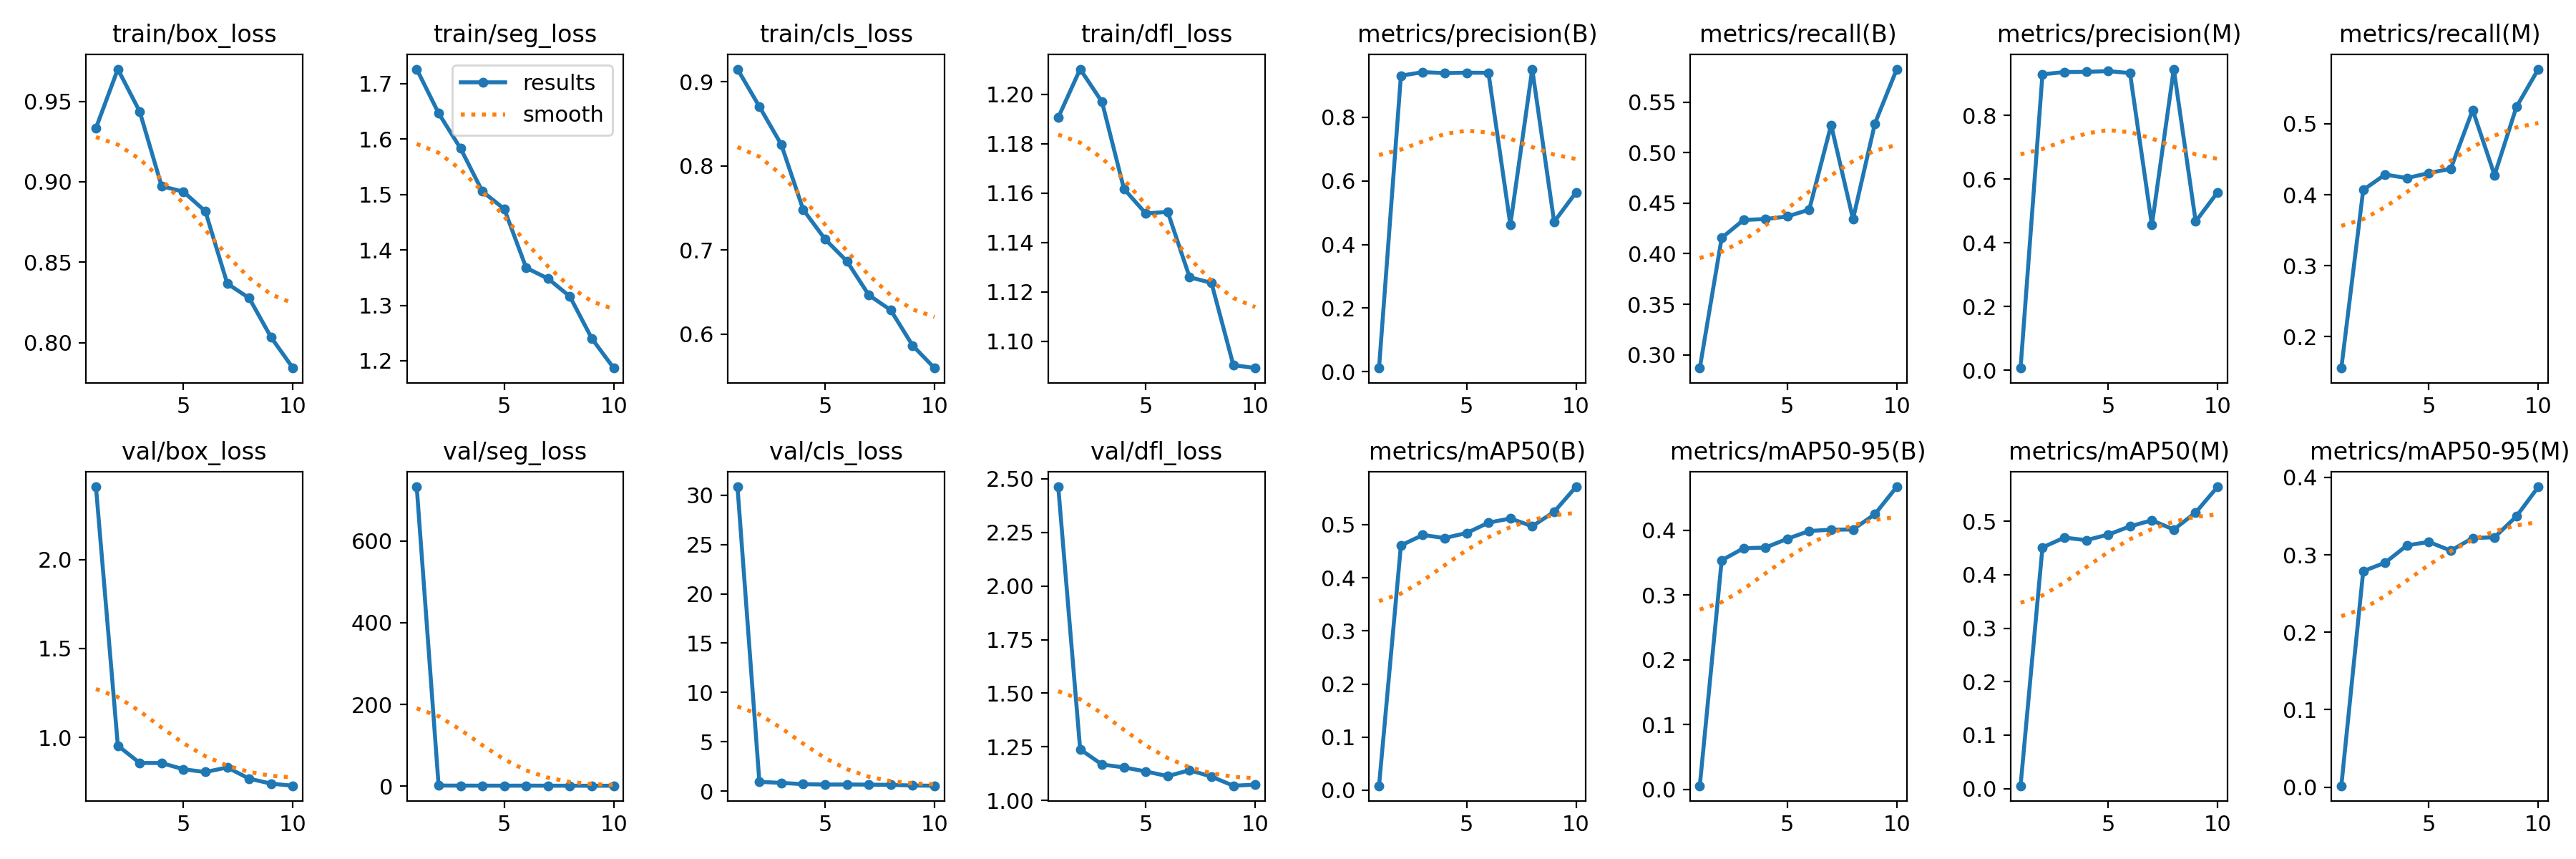

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/results.png")

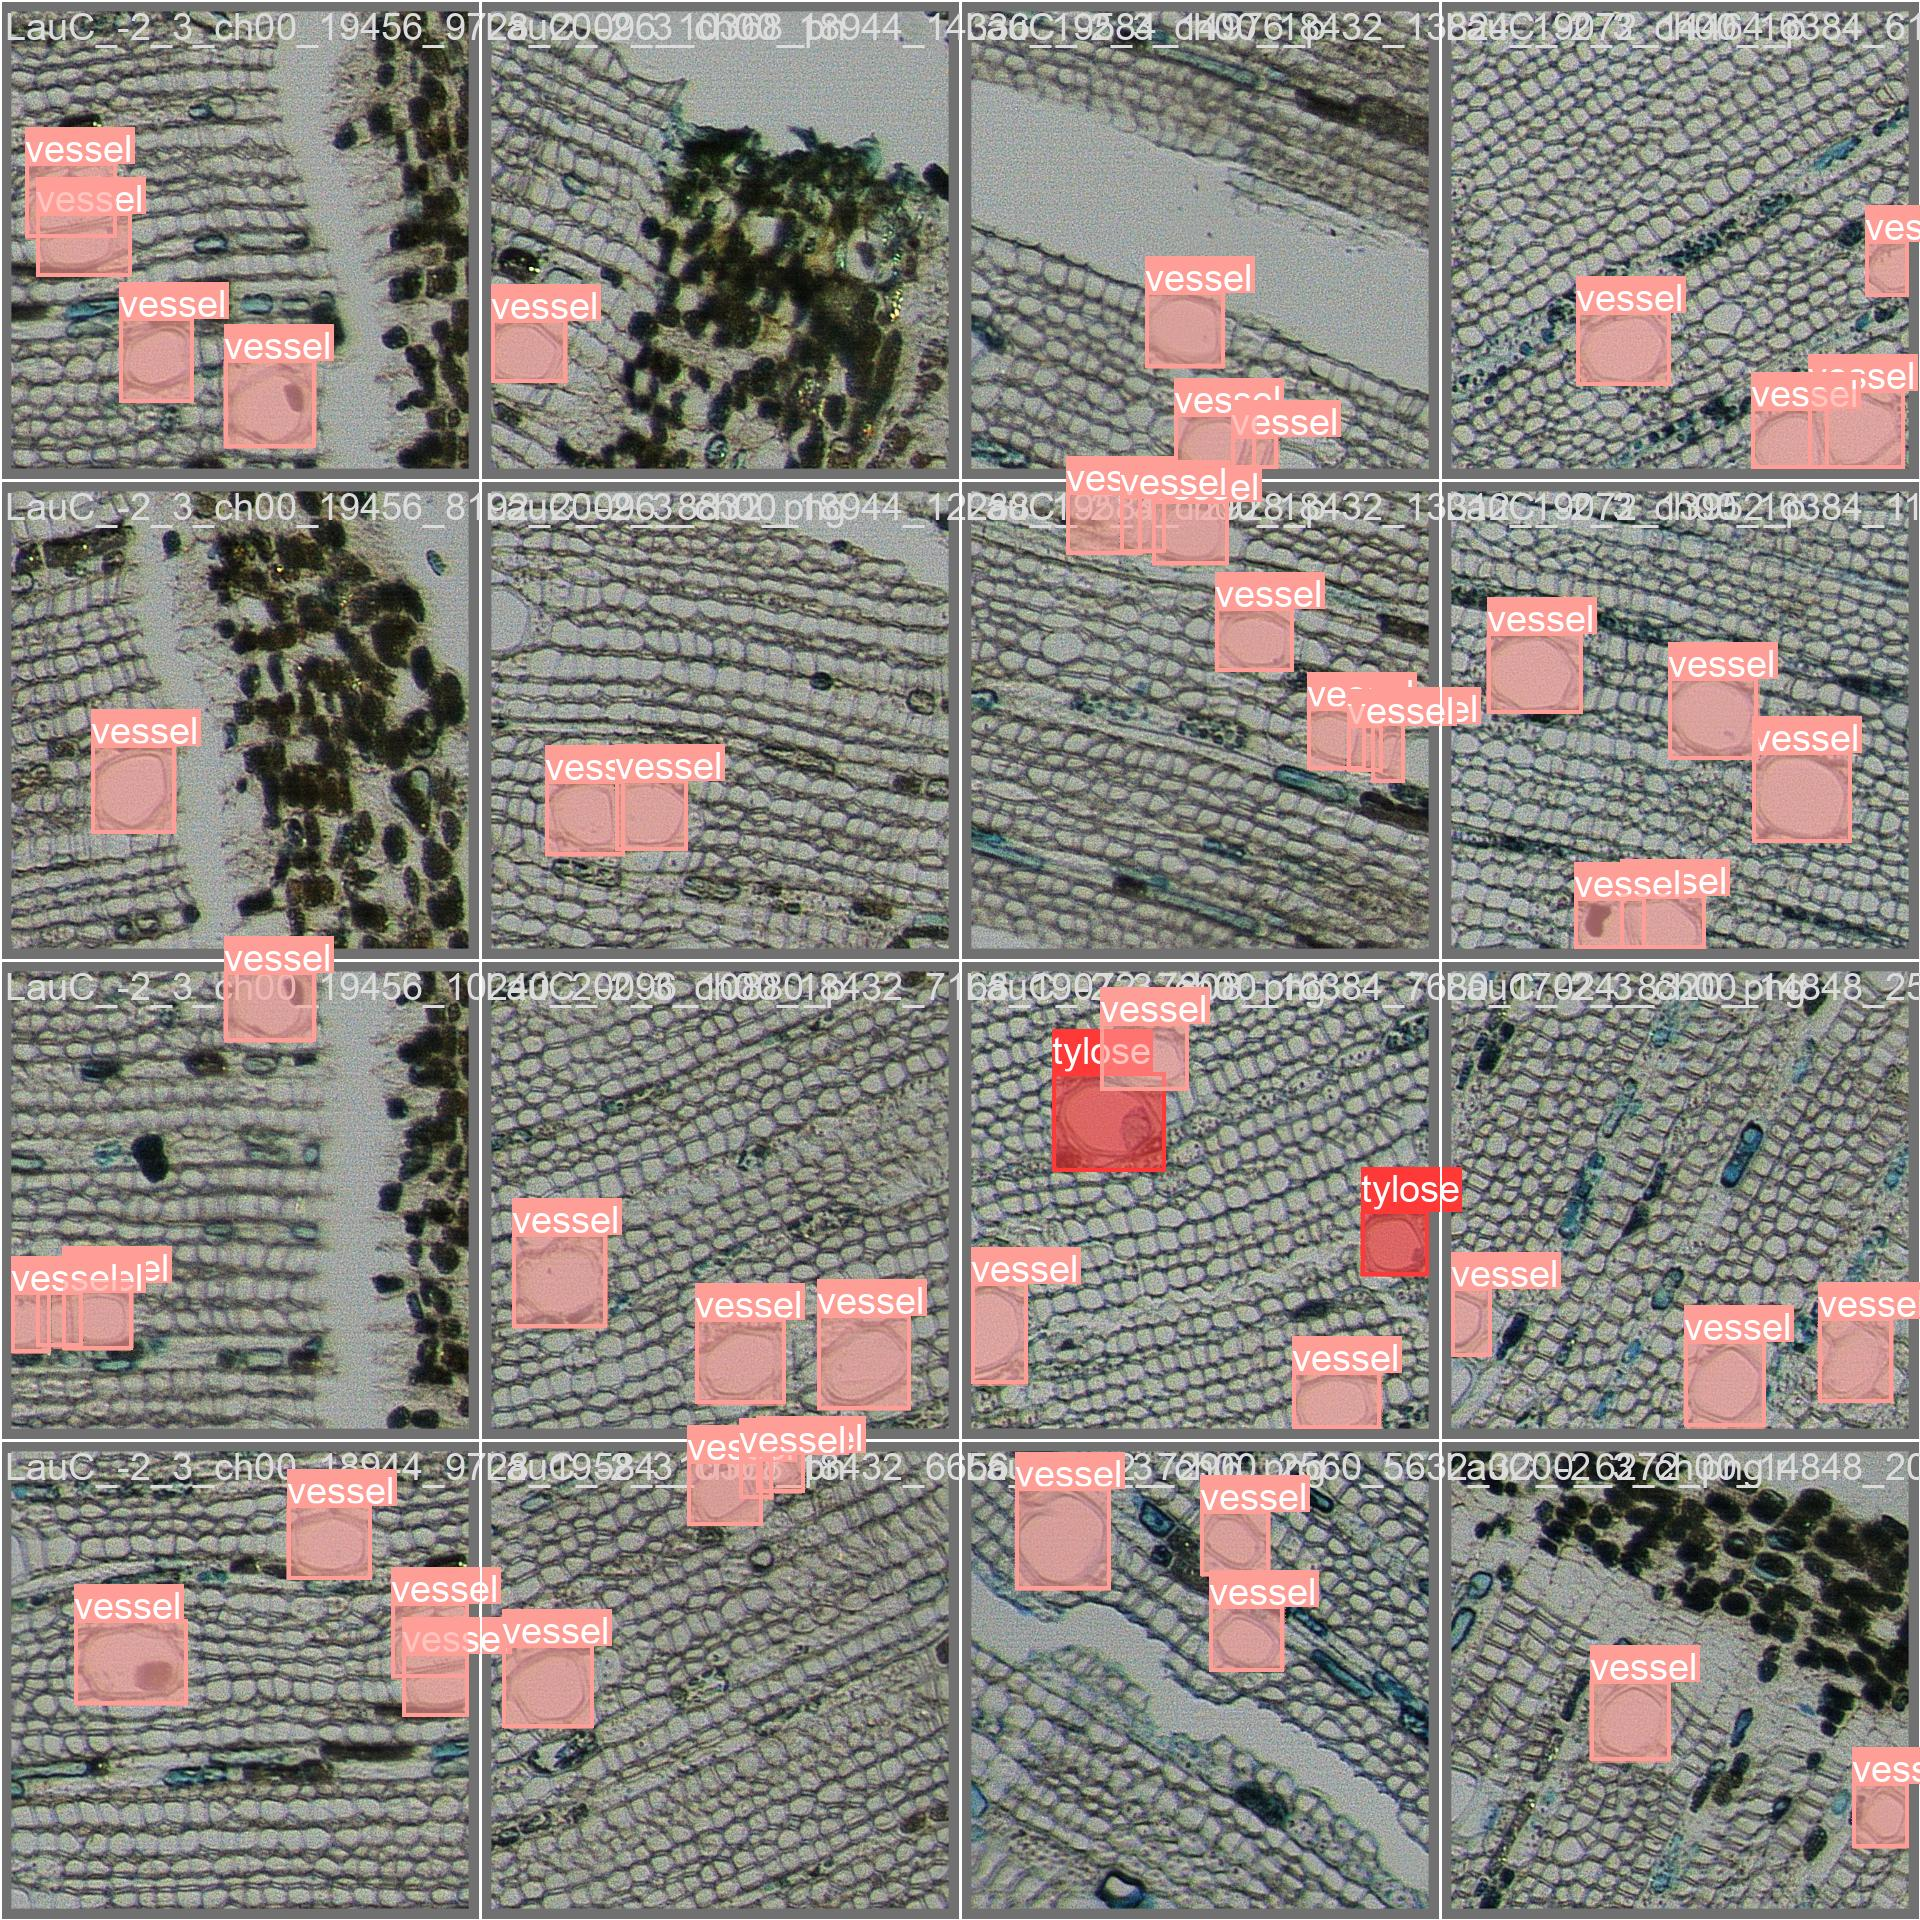

In [ ]:
Image(filename='drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/val_batch2_labels.jpg', width=900)

In [ ]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights

best.pt  last.pt


## 2.7 Run inference  

### 2.7.1 on small images

In [ ]:
my_new_model = YOLO('drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights/best.pt')
metrics = my_new_model.val()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 12.4MB/s]
val: Scanning /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/valid/labels.cache... 362 images, 0 backgrounds, 0 corrupt: 100%|██████████| 362/362 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [44:24<00:00, 115.83s/it]


                   all        362       2175      0.564      0.583      0.571      0.466      0.559      0.577      0.564      0.384
                tylose        362         82      0.312       0.22      0.195      0.147      0.312       0.22      0.195      0.116
                vessel        362       2093      0.815      0.946      0.947      0.786      0.805      0.934      0.933      0.652
Speed: 11.6ms preprocess, 7290.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/val


In [ ]:
# small image
new_image = '/content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/valid/images/LauA_-2_2_10240_10752_10880_11392_png.rf.79698d4b7562a8d5e745b44289742020.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/valid/images/LauA_-2_2_10240_10752_10880_11392_png.rf.79698d4b7562a8d5e745b44289742020.jpg: 640x640 6 vessels, 6171.1ms
Speed: 3.5ms preprocess, 6171.1ms inference, 38.4ms postprocess per image at shape (1, 3, 640, 640)


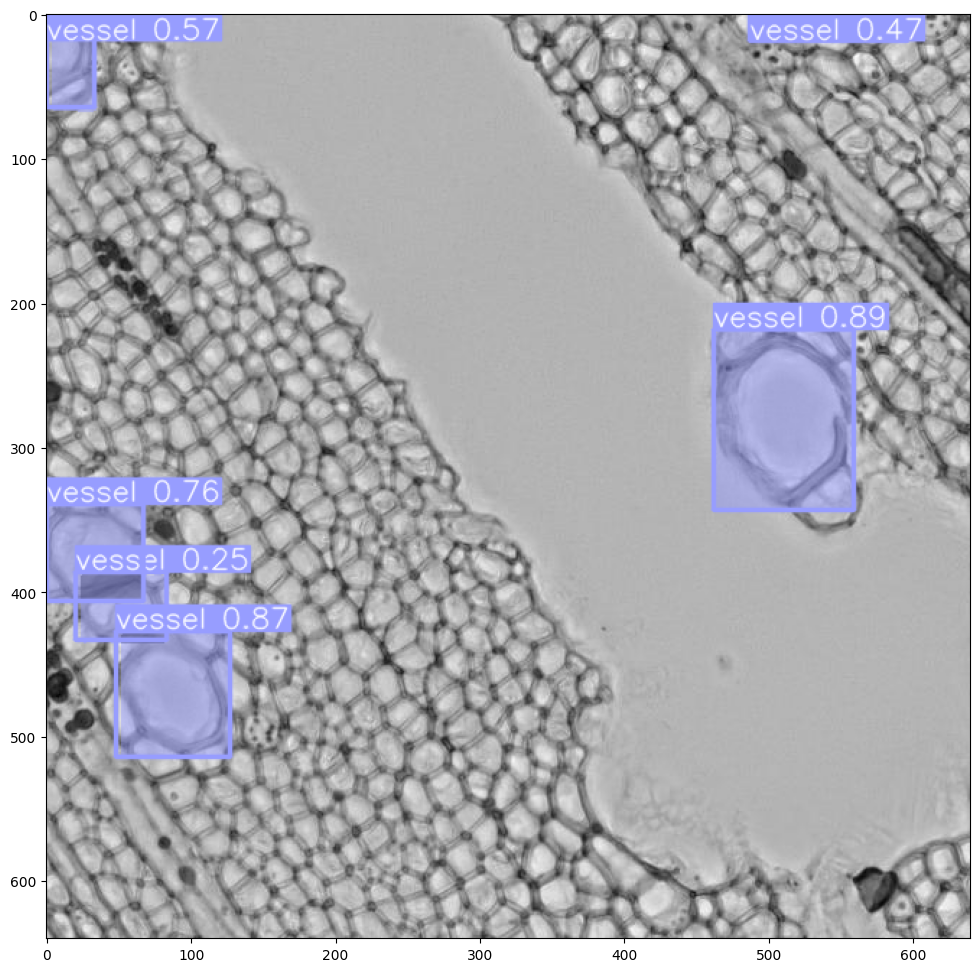

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


In [ ]:
# large image
large_image = '/content/drive/MyDrive/ColabNotebooks/data/3D-EM-Platelet/test/3D-EM-platelet-train04.png'
new_results = my_new_model.predict(large_image, conf=0.5)  #Adjust conf threshold

new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

### 2.7.2 on large images via SAHI slicing

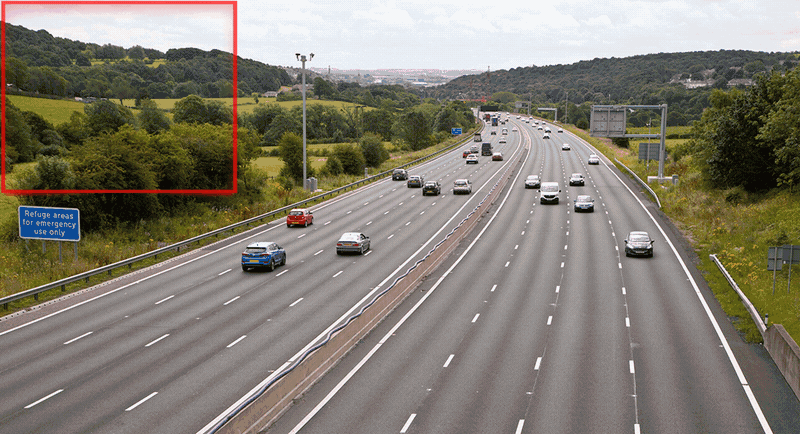

https://github.com/obss/sahi

**Install the SAHI package**

In [ ]:
# Install the sahi package using pip
!pip install sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=177df3a0e5f0c14fbb38cd89e6a2c6c88e1b36beae1a7600b8f019338d5101c5
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [ ]:
from sahi.predict import predict

In [ ]:
# set model path, model_config path and image folder

model_path="drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/weights/best.pt"
model_config_path= "drive/MyDrive/Data/2-3images_640x640.v2i.yolov8/results_v8x/10_epochs-5/args_for_sahi.yaml" # agnostic_nms=True in the .yaml file

images_dir = "../fullsize_images/in_test/"

In [ ]:
predict(
    model_type="yolov8",
    model_path=model_path,
    model_config_path=model_config_path,
    model_device="cuda:0", # "cpu" or 'cuda:0'
    model_confidence_threshold=0.6,
    postprocess_class_agnostic=True,
    source=images_dir,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    visual_bbox_thickness=1,
    visual_text_size=0.5,
    visual_text_thickness=1,
    export_pickle=True
)

# Prediction results will be exported to runs/predict/exp

**count predicted vessels/tyloses!**

In [2]:
import pickle
import json
import os, glob

In [ ]:
def count_prediction_results(pkl_path):
    # open a pickle file, and load as a pickle object
    with open(pkl_path, 'rb') as infile:
        objp = pickle.load(infile)

    # convert pickle object to json object
    json_obj = json.loads(json.dumps(objp, default=str))

    # start the counting
    vessel_counter = 0
    tylose_counter = 0
    for i in range(len(json_obj)):
        if json_obj[i][-8:-2] == "vessel":
            vessel_counter += 1
        elif json_obj[i][-8:-2] == "tylose":
            tylose_counter += 1

    # get the name of the image
    img_name = pkl_path.split(".")[0].split("/")[-1] # 1st split at extension and get the first item, 2nd split at every "/" and fetch the last item

    # print results
    print(img_name, "\tvessel:", vessel_counter, "  tylose:", tylose_counter)

In [ ]:
# count one image
count_prediction_results("runs/predict/exp34/pickles/LauC_1_3.pickle")

In [ ]:
# batch counting
for filepath in glob.iglob('runs/predict/exp35/pickles/*.pickle'): # iglob to process the matched files one by one rather than loading all of the filenames into memory at once.
    count_prediction_results(filepath)

# <font color='blue'><font size ='6'> 3. One more application

## The probelm:

## The solution:

## Section 3 objective:
*

<font size ='6'>